# Introduction

This goal of this project is to analyse academic performance  data uploaded to Kaggle (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data) to demonstrate my EDA skills. I also want to explore ff the statistical conclusions of this analysis are in line with some of the concepts and ideas discussed in a paper I wrote about learning mathematics (also linked in my GitHub).

This project will scope, analyse, prepare, plot data, and seek to explain the findings from the analysis. I aim to investigate the variables that impact a students' success when it comes to exam score; such as socioeconomic factors, gender and lifestyle factors. 

As I conduct my analysis I will pose some specific questions I will seek to answer using data.

**Data sources:**
 `StudentPerformanceFactors.csv` 

## Scoping

It's beneficial to create a project scope. The 4 sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, it needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which includes the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through then lens of a mathematics graduate who wants to investigate what makes a successful student (in exams). I also want to see if the conclusions I made in my academic essay can be generalised to wider student populations with statistical evidence. Some of the questions I will seek to answer are:

- What socioeconomic factors have the most impact on exam score?
- How much of an impact revision and preparation has on exam score?
- What is the distribution of scores, could this be used to inform us of weakness in topics of the population?

### Data

This project has one data set as a `csv` file. This dataset contains detailed records of exam scoress acorss reading, writing and maths. It also contains other variables such as lunch, race and level of parental education which could all be contributing factors to a students exam score.

### Analysis

In this section, descriptive statistics and data visualisation techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between score and socioeconomic factors
1. Score trends
1. Siginificance tests

It is important to conduct exploratory data analysis for the following reasons:
 1. Maximise insight into the data
 1. Understand connections between variables 
 1. Extract the important/significant vairables 
 1. Detect anomalies
 1. Test underlying assumptions


### Evaluation

Lastly, I will revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This will also include limitations or if any of the analysis could have been done using different methodologies.

<h3>Import modules</h3>

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h3>Import the data and obtain data characteristics</h3>

In [59]:
studentsPerformance_df = pd.read_csv("/Users/jai/Documents/GitHub/EDARepo/academicPerformanceEDA/StudentPerformanceFactors.csv")
display(studentsPerformance_df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [60]:
studentsPerformance_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

The data consists of 6607 observations, across 20 different variables.

In [61]:
print(f"The data shape is: {studentsPerformance_df.shape}")

The data shape is: (6607, 20)


<h3>Missing data check</h3>

In [62]:
studentsPerformance_df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Out of 6607 observations there are some missing value is the columns for <code> Teacher_Quality, Parental_Education_Level and Distance_From_Home</code>. To deal with the missing data I could consider imputation, but since the number of missing observations is relatively low in comparison to the population of the data I am happy to drop all rows with missing data. The risk of introducing bias in this case is low.


Note:
Before I do drop the tables I want to take a look at the missing data entries to check for potential reasons as to why it is missing.

<code>Teacher_Quality</code> - potential reasons for missig data is that it was never filled in at random. The data is MCAR in which case it is sensible to delete the rows to avoid introducing bias.

<code>Parental_Education_Level</code> - Potential reasons for missing data is tht there was no appropriate category, for example people who did not finish High School. This is likely to have an impact on observed data (test scores) so I am going to treat it as MAR. In this case because there is no category to accurately represent this scenario I am going to delete the rows. 

<code>Distance_From_Home</code> - I am going to treat this data as MCAR and undertake listewise deletion.

In [63]:
studentsPerformance_df.Teacher_Quality.value_counts()

Medium    3925
High      1947
Low        657
Name: Teacher_Quality, dtype: int64

In [64]:
studentsPerformance_df.Parental_Education_Level.value_counts()

High School     3223
College         1989
Postgraduate    1305
Name: Parental_Education_Level, dtype: int64

In [65]:
studentsPerformance_df.Distance_from_Home.value_counts()

Near        3884
Moderate    1998
Far          658
Name: Distance_from_Home, dtype: int64

<h2>Variable Analysis</h2>

I am going to take a look into the individual variables, identify distributions and summary statistics of each variable.

The summary statisics give us an insight into the central measures of the variables that impact test scores. 

Care needs to be taken to treat the some of the integer variables are discrete so the distribution needs to be shown using a bar chart.
 1. <code>Sleep_Hours</code>
 2. <code> Tutoring_Sessions</code>
 3. <code> Physical_Activity</code>

In [66]:
studentsPerformance_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [67]:
# To describe the qaulitative categorical variables
studentsPerformance_df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


 1. Hours Studied Distribution
 The distribution appears to be right-skewed, indicating that most students tend to study for a moderate number of hours, with fewer students studying for either very short or very long durations. The peak suggests an optimal study duration where most students fall within a specific range.

 2. Attendance Distribution
 The data suggests a fairly uniform distribution across different attendance percentages, with slight fluctuations. There is no clear central tendency, which could indicate that attendance is distributed relatively evenly across the student population, although a drop-off is visible at both extremes.

 3. Previous Scores Distribution
 The distribution of previous scores appears relatively uniform, suggesting that students' past academic performances vary widely. There is no strong skew, meaning that previous scores are fairly evenly spread across the range. However, some bins show slight variations, indicating potential clustering at certain score intervals.

 4. Exam Score Distribution
 This distribution exhibits a normal-like shape with a clear central tendency, indicating that most students score within a middle range, while fewer students achieve very low or very high marks. This suggests a natural variation in student performance, possibly following a bell curve pattern.

 5. Sleep Hours Distribution
 The distribution indicates that most students sleep between 6 to 8 hours, with the highest frequency occurring at 7 hours. There is a sharp decline in students sleeping fewer than 5 or more than 9 hours, suggesting that extreme sleep durations are uncommon.

 6. Tutoring Sessions Distribution
 Most students have had zero or very few tutoring sessions, with the frequency decreasing significantly as the number of tutoring sessions increases. This suggests that while some students seek additional help, the majority do not engage in frequent tutoring.

 7. Physical Activity Distribution
 The majority of students engage in moderate levels of physical activity, with the most common values centered around 2–3 activity sessions per week. There is a sharp decline in students with either no physical activity or excessive activity, suggesting that extreme behaviors are relatively rare.

General Observations:

Some variables, such as hours studied and exam scores, display natural distribution patterns (e.g., right-skewed and bell curve, respectively), which aligns with common academic performance trends.
Attendance and previous scores appear more uniformly distributed, which could indicate that external factors contribute to variability.
Sleep hours and physical activity show clustering around moderate values, suggesting that extreme cases (either too little or too much) are less common.
The low participation in tutoring sessions may indicate that most students rely on independent study or that tutoring services are not widely accessible or used.


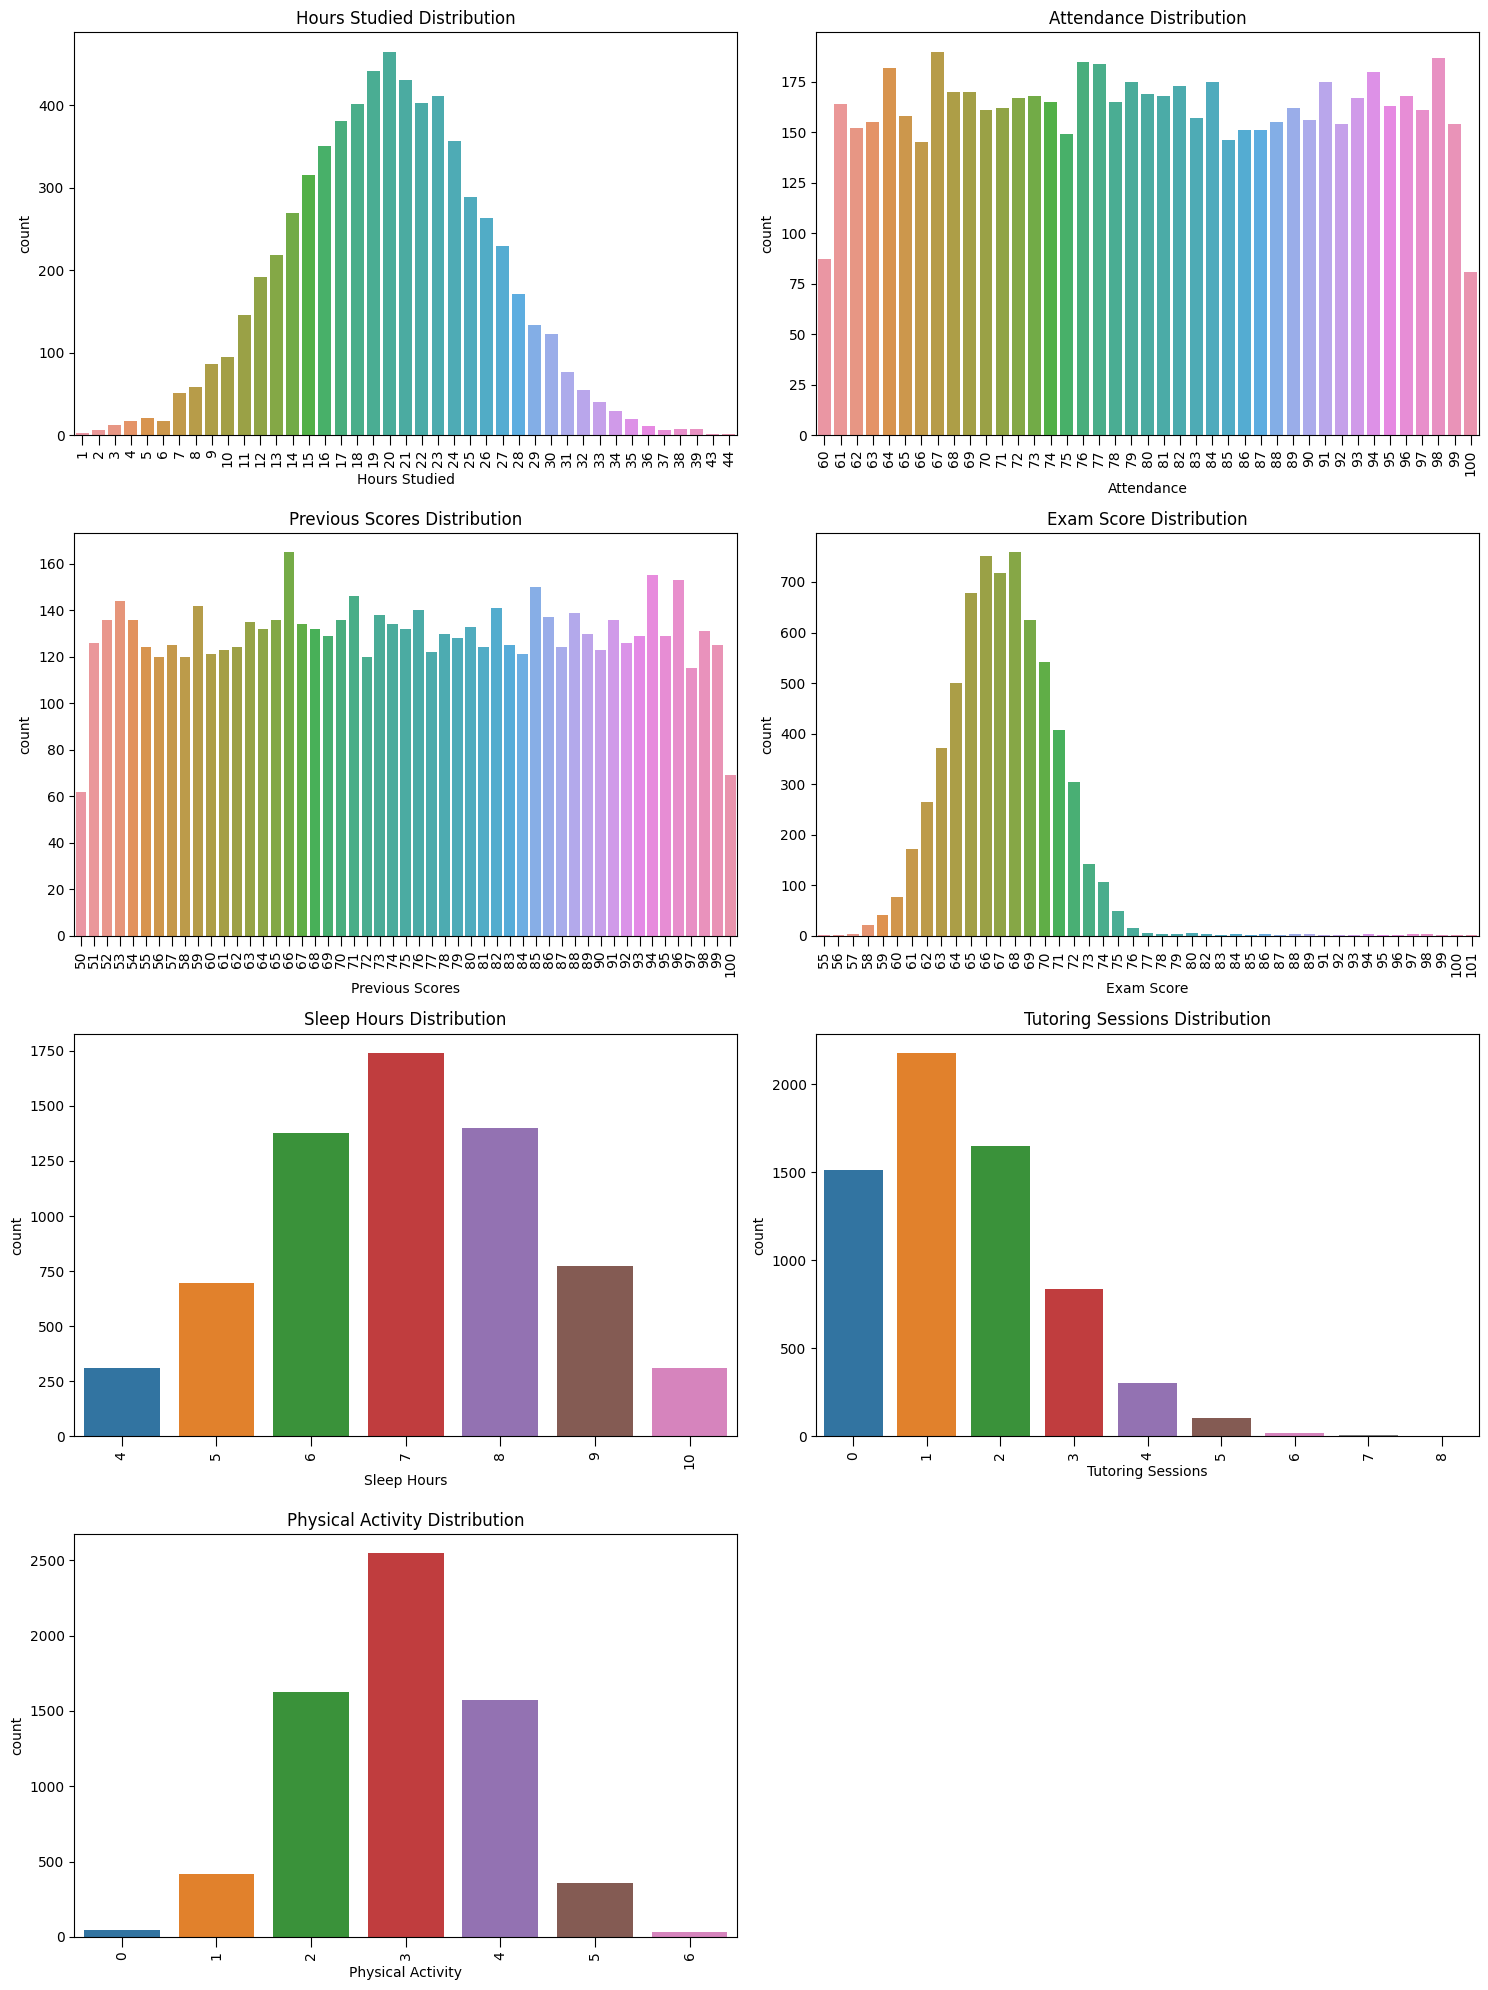

In [68]:
# Distribution of each of the integer variables 

# Take input as a list of the numerical variables. Note they are discrete so a countplot is best.
numericalVariables =["Hours_Studied", "Attendance", "Previous_Scores",  "Exam_Score", "Sleep_Hours", "Tutoring_Sessions", "Physical_Activity"]

def numericalDistribution(numericalVariable):
    fig, axes = plt.subplots(4,2, figsize=(15,20))
    axes = axes.flatten()
    for i, numericalVariable in enumerate(numericalVariables):
        sns.countplot(data=studentsPerformance_df, x=studentsPerformance_df[numericalVariable],  ax=axes[i])
        title = numericalVariable.replace("_", " ")
        axes[i].set_title(f"{title} Distribution")
        axes[i].tick_params(axis='x', rotation=90, size=7)
        axes[i].set_xlabel(title)
    axes.flat[-1].set_visible(False)
    plt.tight_layout()
    plt.show()

numericalDistribution(numericalVariables)

 1. Parental Involvement
 The majority of students (50.9%) have medium parental involvement.
 A lower percentage (28.9%) experience high parental involvement, and 20.2% have low involvement.
 This suggests that while most parents are somewhat involved, highly engaged parents are in the minority, which could impact academic performance.
 
 2. Access to Resources
 The distribution is very similar to parental involvement:
 50.2% of students report medium access,
 29.9% have high access,
 19.9% report low access.
 This suggests that while most students have a moderate level of educational resources, a significant portion still struggles with limited access.
 
 3. Extracurricular Activities
 59.6% of students participate in extracurricular activities, while 40.4% do not.
 A considerable proportion of students do not engage in extracurriculars, which could imply limited opportunities, lack of interest, or time constraints due to academics.
 
 4. Internet Access
 A large majority (92.4%) of students have internet access, while only 7.6% lack it.
 small percentage without internet may still face educational disadvantages.
 
 5. Family Income
 40.4% of students belong to low-income and medium-income families each, while only 19.2% come from high-income backgrounds.
 This suggests a predominantly lower-to-middle-class demographic, which might influence access to resources, tutoring, and overall academic performance.
 
 6. Teacher Quality
 60.1% of students perceive teacher quality as medium,
 29.8% rate it as high,
 10.1% find it low.
 This suggests that while most students receive an average teaching experience, there is room for improvement in quality.
 
 7. School Type
 69.6% of students attend public schools, while 30.4% attend private schools.
 This reflects the general trend of public education being the dominant option, possibly due to financial constraints or accessibility.
 
 8. Peer Influence
 Peer influence is relatively evenly distributed, with 39.9% reporting positive influence, 39.2% reporting neutral, and 20.8% reporting negative influence.
 The presence of negative influence could indicate the potential for peer pressure or discouraging academic behaviors among some students.
 
 9. Learning Disabilities
 10.5% of students have a learning disability, while 89.5% do not.
 Although this percentage is relatively low, it highlights the need for support systems for students who require additional learning accommodations.
 
 10. Parental Education Level
 49.5% of students' parents have a high school education,
 30.5% have attended college,
 20% have a postgraduate degree.
 This suggests that a significant portion of students come from families with lower formal education levels, which might impact academic support at home.
 
 11. Distance from Home
 59.4% of students live near their school,
 30.6% at a moderate distance,
 10.1% live far away.
 Students who travel long distances may face higher stress and less time for studying or extracurriculars.
 
 12. Gender Distribution
 The dataset consists of 57.7% male and 42.3% female students.
 This indicates a slight male majority, which could influence gender-based performance trends in certain academic areas.

General Observations:

Parental involvement, access to resources, and teacher quality tend to cluster around a medium level, suggesting a common middle-ground experience for most students.
Internet access is widely available, reducing digital divides in education.
Extracurricular participation is high, but a significant portion of students (40%) are missing out on these activities.
Income distribution is skewed toward lower and middle-income levels, which may impact educational access and opportunities.
Peer influence is mixed, with a non-negligible percentage reporting negative peer effects.
Most students live close to school, which may reduce transportation-related stress and allow more time for studies.

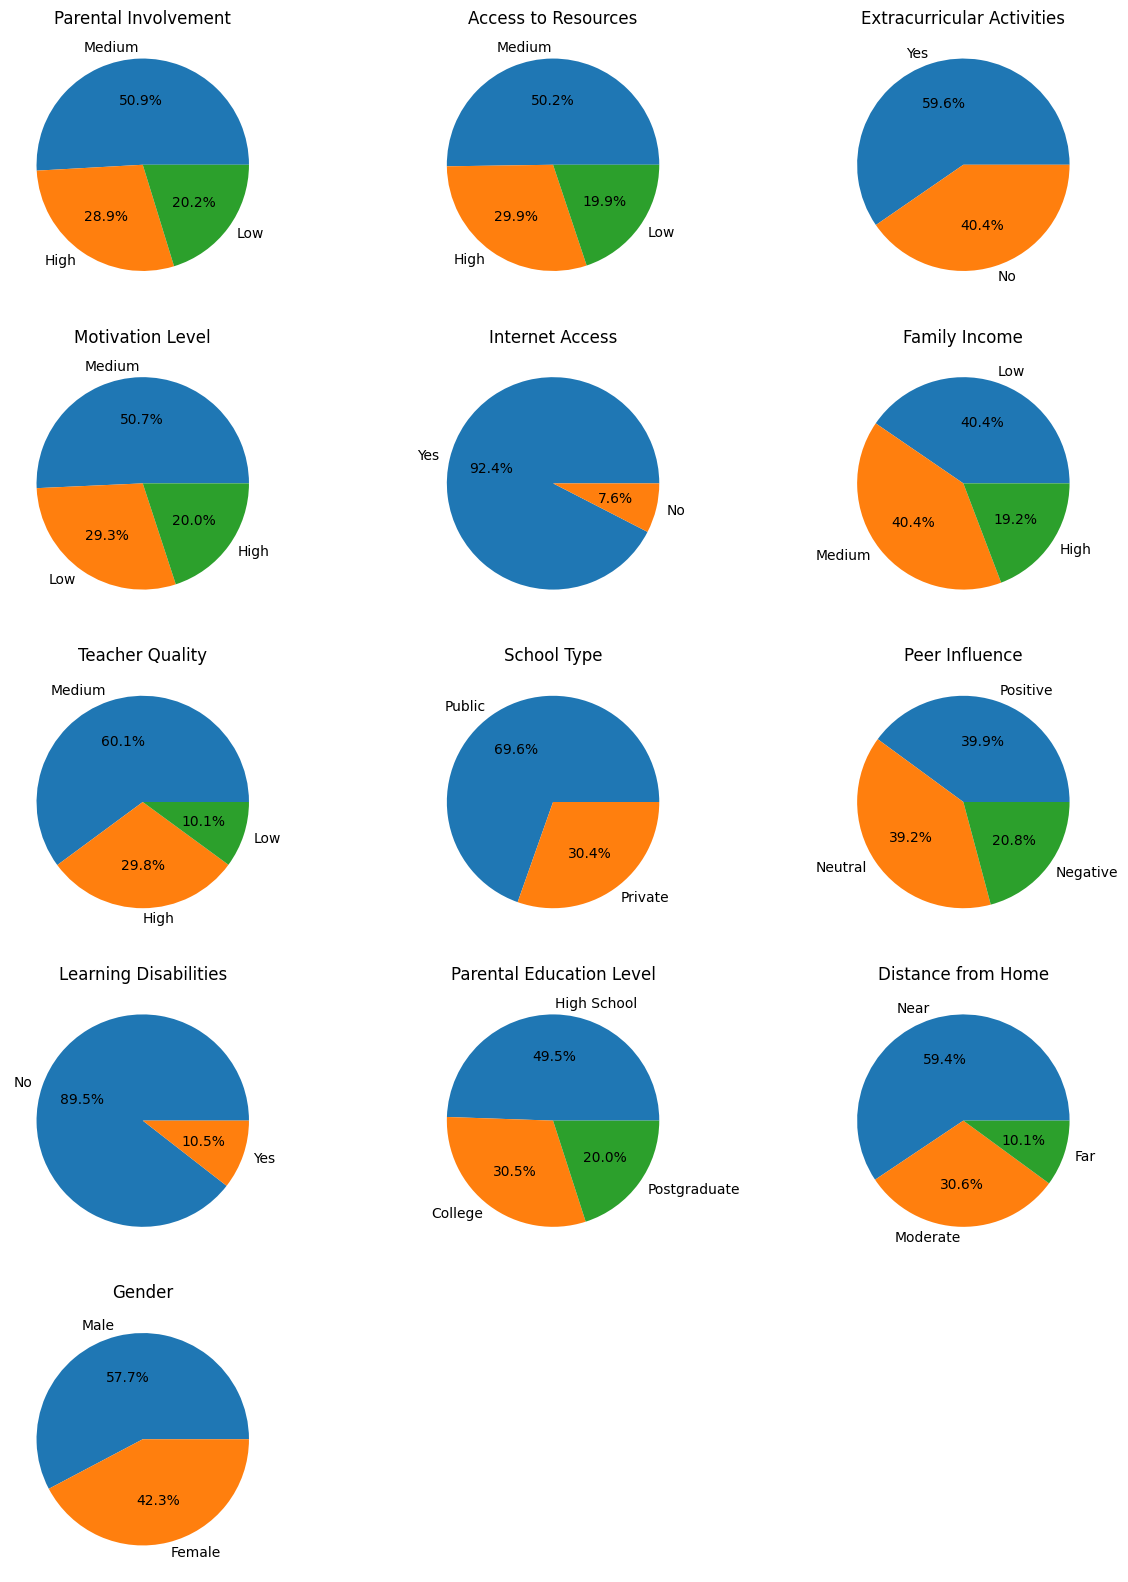

In [69]:
categoricalVariables = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

def categoricalDistribution(categoricalVariables):
    fig, axes = plt.subplots(5, 3, figsize=(15, 20))  
    axes = axes.flatten() 
    
    for i, categoricalVariable in enumerate(categoricalVariables):
        studentsPerformance_df[categoricalVariable].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[i])
        axes[i].set_title(categoricalVariable.replace("_", " "))
        axes[i].set_ylabel("")  # Remove y-axis labels for clarity
    axes.flat[-1].set_visible(False)
    axes.flat[-2].set_visible(False)
    plt.show()

categoricalDistribution(categoricalVariables)

<h3>Correlation Heatmap</h3>


 1. Hours Studied vs. Exam Score (0.45)
 Moderate positive correlation suggests that studying more hours tends to improve exam scores.
 However, the correlation is not extremely high, indicating other factors also contribute significantly.

 2. Attendance vs. Exam Score (0.58)
 Strongest positive correlation in the matrix.
 This suggests that students who attend classes more regularly tend to perform better on exams.

 3. Tutoring Sessions vs. Exam Score (0.18)
 Weak positive correlation.
 While tutoring may help, it is not a major factor in determining exam scores in this dataset.
 
 4. Previous Scores vs. Exam Score (0.18)
 A small correlation suggests that past performance plays a limited role in determining current exam success.
 This could imply that other factors (effort, studying, attendance) have a bigger influence on performance.

 5. Physical Activity vs. Exam Score (0.028)
 Very weak correlation, almost negligible.
 This suggests that exercise does not have a noticeable impact on academic performance in this dataset.

 6. Sleep Hours vs. Exam Score (-0.017)
 Near-zero negative correlation, meaning there is no significant relationship between sleep and exam scores.
 However, this does not mean sleep is unimportant—other factors like sleep quality could play a role.

 7. Attendance vs. Hours Studied (-0.0099)
 Almost no correlation, suggesting that attending classes does not necessarily mean studying more hours.
 Some students may rely on lectures, while others may study independently.
 Tutoring Sessions vs. Hours Studied (-0.014)
 Almost no correlation, indicating that students who receive tutoring do not necessarily study more or less outside of tutoring.


Conclusions:

Attendance is the strongest predictor of exam scores in this dataset.
Studying more hours helps significantly, but not as much as attendance.
Past performance and tutoring have some impact, but not a major one.
Sleep and physical activity do not show any significant relationship with exam scores.


/var/folders/c8/d8w55bgd5sd503rlpx_ymlp00000gn/T/ipykernel_1116/2149969958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = studentsPerformance_df.corr()


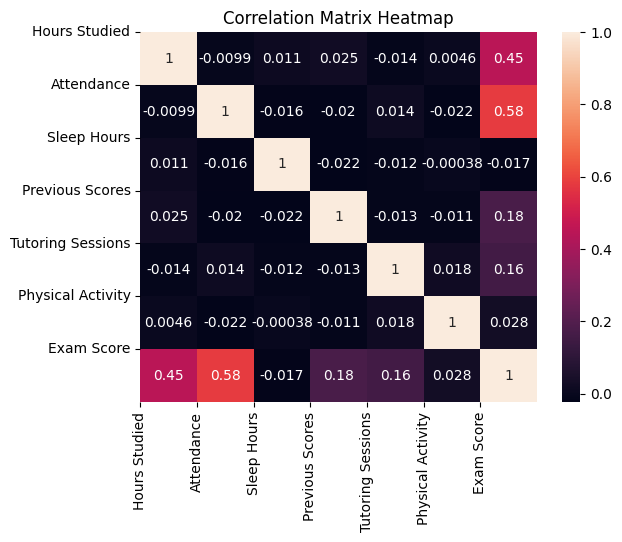

In [70]:
correlation_matrix = studentsPerformance_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns.str.replace("_", " "), rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.columns.str.replace("_", " "))
plt.show()

<h3>Exam Score Breakdown</h3>

In this section I look to drilldown on the distribution of Exam scores based on certain categorical variables. 

 1. Generally, males perfrom beter academically - normalised for the population as the number of males and females are not equal.

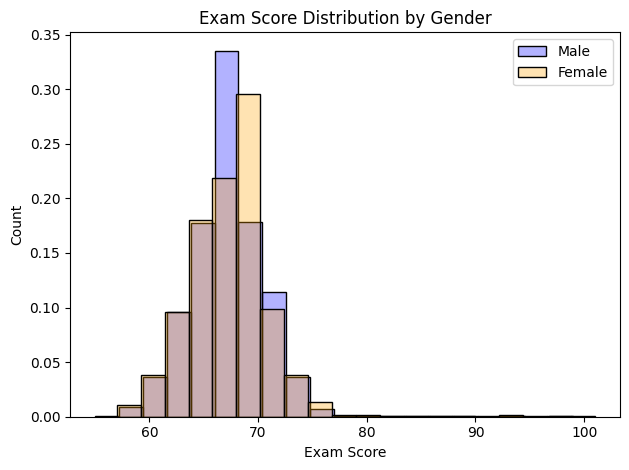

In [71]:
# Gender vs Exam Score

# Males
sns.histplot(data=studentsPerformance_df[studentsPerformance_df['Gender'] == 'Male'],
             x='Exam_Score',
             bins=20,
             color='blue',
             label='Male',
             alpha=0.3,  
             kde=False,
             stat='probability')

# Females
sns.histplot(data=studentsPerformance_df[studentsPerformance_df['Gender'] == 'Female'],
             x='Exam_Score',
             bins=20,
             color='orange',
             label='Female',
             alpha=0.3,  
             kde=False,
             stat='probability')

plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.title('Exam Score Distribution by Gender')
plt.legend()
plt.tight_layout()
plt.show()

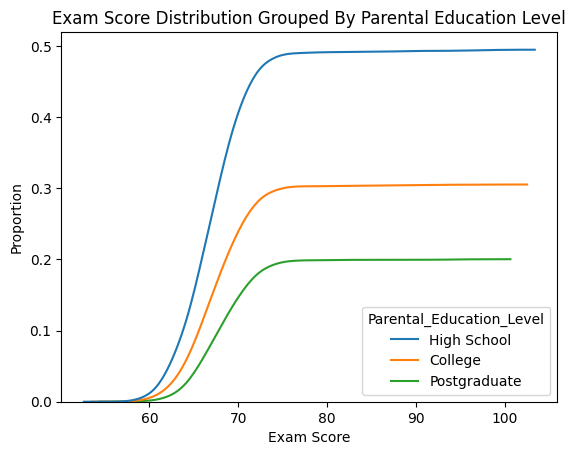

In [92]:
sns.kdeplot(
    data=studentsPerformance_df, 
    x="Exam_Score", 
    hue="Parental_Education_Level",
    cumulative=True, 
    common_norm=True
)

plt.title("Exam Score Distribution y Parental Education Level")
plt.xlabel("Exam Score")
plt.ylabel("Proportion")
plt.show()


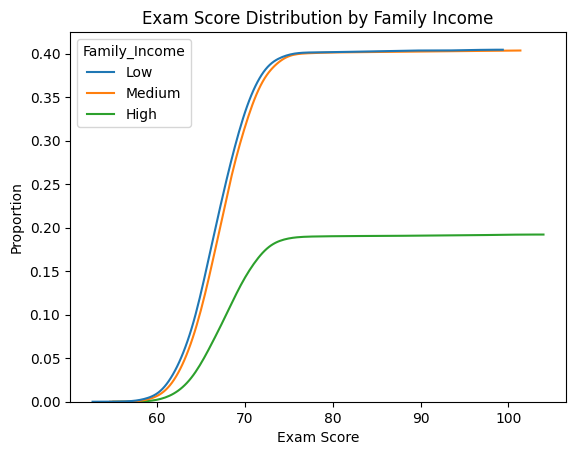

In [96]:
sns.kdeplot(
    data=studentsPerformance_df, 
    x="Exam_Score", 
    hue="Family_Income",
    cumulative=True, 
    common_norm=True
)

plt.title("Exam Score Distribution by Family Income")
plt.xlabel("Exam Score")
plt.ylabel("Proportion")
plt.show()

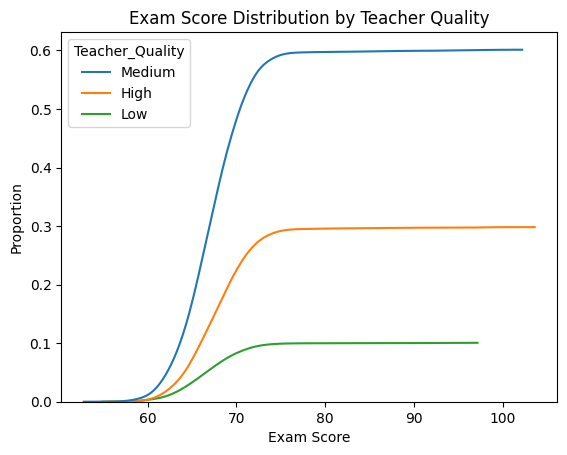

In [99]:
sns.kdeplot(
    data=studentsPerformance_df, 
    x="Exam_Score", 
    hue="Teacher_Quality",
    cumulative=True, 
    common_norm=True
)

plt.title("Exam Score Distribution by Teacher Quality")
plt.xlabel("Exam Score")
plt.ylabel("Proportion")
plt.show()

<h3>Statistical Significance</h3>

This section will run some chi-squared tests to see if different variables have statistically significant differences in exam score results. In order to run a chi squared test, a contingency table will need to be created.

The primary use of a chi-square test is to examine whether two <b>categorical variables</b> are independent or related. For example, parental education level and access to resources.

H0: Level of parental education and family income are independent
H1: Level of parental education and family income are NOT independent
Significance Level = 5%

p-value = 0.89
0.89>0.05 thus reject H1 and accept H0. They are independent.

In [101]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(
    studentsPerformance_df['Parental_Education_Level'],
    studentsPerformance_df['Family_Income']
)
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)



Family_Income             High   Low  Medium
Parental_Education_Level                    
College                    370   805     814
High School                633  1305    1285
Postgraduate               252   523     530
Chi-squared Statistic: 1.102722453346349
Degrees of Freedom: 4
P-value: 0.8938400181954373


<h3>Conclusion</h3>

- What socioeconomic factors have the most impact on exam score? - From the correlation heatmap we can see the three most impactful socioeconomic facotrs are: Tutoring sessions (assuming they cost). The data also suggests higher family income leads to higher exam scores. 
- How much of an impact revision and preparation has on exam score? Attendance and hours studiied were the two most impactful variables correlated to higher exam scores.
- What is the distribution of scores, could this be used to inform us of weakness in topics of the population? Without understanding the content of the exam it is not possible to identify areas of weakness in certain topics. 